In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from datetime import datetime

In [4]:
X, y = load_diabetes().data, load_diabetes().target.reshape(-1,1)

In [5]:
X.shape, y.shape

((442, 10), (442, 1))

In [24]:
class NN_build(object):
    def __init__(self, eta = 0.005, iterations = 1000, epsilon = 0.01, dims = [10,30,30,1]):
        self.eta = eta
        self.epsilon = epsilon
        self.dims = dims
        self.layer = len(dims)
        self.iterations = iterations
        
    def fit(self, X,y):
        X_ = X.T
        y_ = y.T
        A0 = X_
        i = 1
        m_ =len(y)
        cost_ = []
        parameters = {}
        
        
        for l in range(1, self.layer):
            parameters['W'+str(l)] = np.random.randn(self.dims[l], self.dims[l-1]) * self.epsilon
            parameters['b'+str(l)] = np.zeros((self.dims[l],1))     
        
        
        while(i != self.iterations):
            time1 = datetime.now()
            #forward prop
            Z1 = np.dot(parameters['W1'],A0) + parameters['b1']
            A1 = self.sigmoid(Z1)
            Z2 =  np.dot(parameters['W2'],A1) + parameters['b2']
            A2 = self.sigmoid(Z2)
            Z3 =  np.dot(parameters['W3'],A2) + parameters['b3']
            A3 = Z3
            #cost
            cost = self.cost(y_,A3,m_)
            cost_.append(cost)          
            #derivatives
            dZ3 = A3 - y_
            dW3 = (1/m_) * np.dot(dZ3,A2.T)
            db3 = (1/m_) * np.sum(dZ3, axis =1 , keepdims=True)
            dZ2 = np.dot(parameters['W3'].T, dZ3) * (A2 * (1-A2))
            dW2 = (1/m_) * np.dot(dZ2,A1.T)
            db2 = (1/m_) * np.sum(dZ2, axis =1 , keepdims=True)
            dZ1 = np.dot(parameters['W2'].T, dZ2) * (A1 * (1-A1))
            dW1 = (1/m_) * np.dot(dZ1,A0.T)
            db1 = (1/m_) * np.sum(dZ1, axis =1 , keepdims=True)         
            #updates
            parameters['W3'] -= self.eta * dW3
            parameters['W2'] -= self.eta * dW2
            parameters['W1'] -= self.eta * dW1
            parameters['b3'] -= self.eta * db3
            parameters['b2'] -= self.eta * db2
            parameters['b1'] -= self.eta * db1
            #inform
            time2 = datetime.now()
            time_step = time2 - time1
            if i % 200 == 0:
                print('epochs_{}::cost:{}::time:{}'.format(i,cost,time_step))
            
            i += 1
        history = pd.DataFrame(cost_ , columns=['cost'])
        plt.figure(figsize = (14,4))
        plt.subplot(1,1,1)
        plt.plot(history.cost)
        plt.show()           
        
        return parameters
    
    
    def cost(self,y_true,y_pred,m_):
        return (1/2*m_ ) * np.sum(np.square(y_true - y_pred))
    
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    

        

epochs_200::cost:580085519.7096593::time:0:00:00.001505
epochs_400::cost:579109449.9820828::time:0:00:00.001208
epochs_600::cost:579038115.2906289::time:0:00:00.000999
epochs_800::cost:578958107.5387619::time:0:00:00.000888
epochs_1000::cost:578864548.5988165::time:0:00:00.001010
epochs_1200::cost:578750774.3185841::time:0:00:00.000997
epochs_1400::cost:578606671.0633941::time:0:00:00.000997
epochs_1600::cost:578416034.9357253::time:0:00:00.001994
epochs_1800::cost:578151485.2608949::time:0:00:00.001972


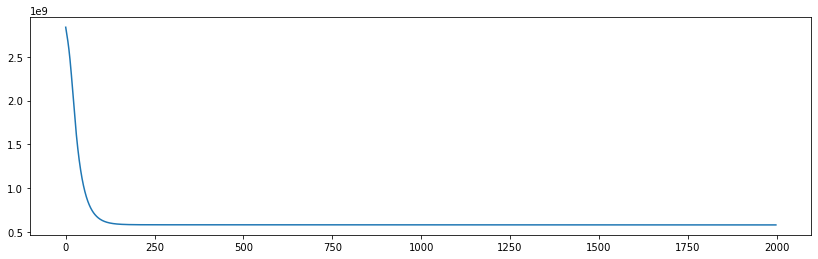

In [27]:
parameters = NN_build(eta = 0.0005, iterations= 2000, epsilon= 0.05, dims= [10,40,40,1]).fit(X,y)